In [3]:
import pandas as pd

file_path = "/Users/anirudhravipudi/Desktop/AI/Projects/ToyotaCorolla.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

categorical_vars = df.select_dtypes(include='object').columns.tolist()
print("Categorical Variables:", categorical_vars)

print(df[categorical_vars].nunique())

Categorical Variables: ['Model', 'Fuel_Type', 'Color']
Model        319
Fuel_Type      3
Color         10
dtype: int64


In [10]:
df_cleaned = df.drop(columns=['Model'])

df_encoded = pd.get_dummies(df_cleaned, columns=['Fuel_Type', 'Color'], drop_first=True)

df_encoded.head()

,Id,Price,Age (month),Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,13500,23,10,2002,46986,90,1,0,2000,...,False,False,True,False,False,False,False,False,False,False
1,2,13750,23,10,2002,72937,90,1,0,2000,...,False,False,False,False,False,False,True,False,False,False
2,3,13950,24,9,2002,41711,90,1,0,2000,...,False,False,True,False,False,False,False,False,False,False
3,4,14950,26,7,2002,48000,90,0,0,2000,...,False,True,False,False,False,False,False,False,False,False
4,5,13750,30,3,2002,38500,90,0,0,2000,...,False,True,False,False,False,False,False,False,False,False


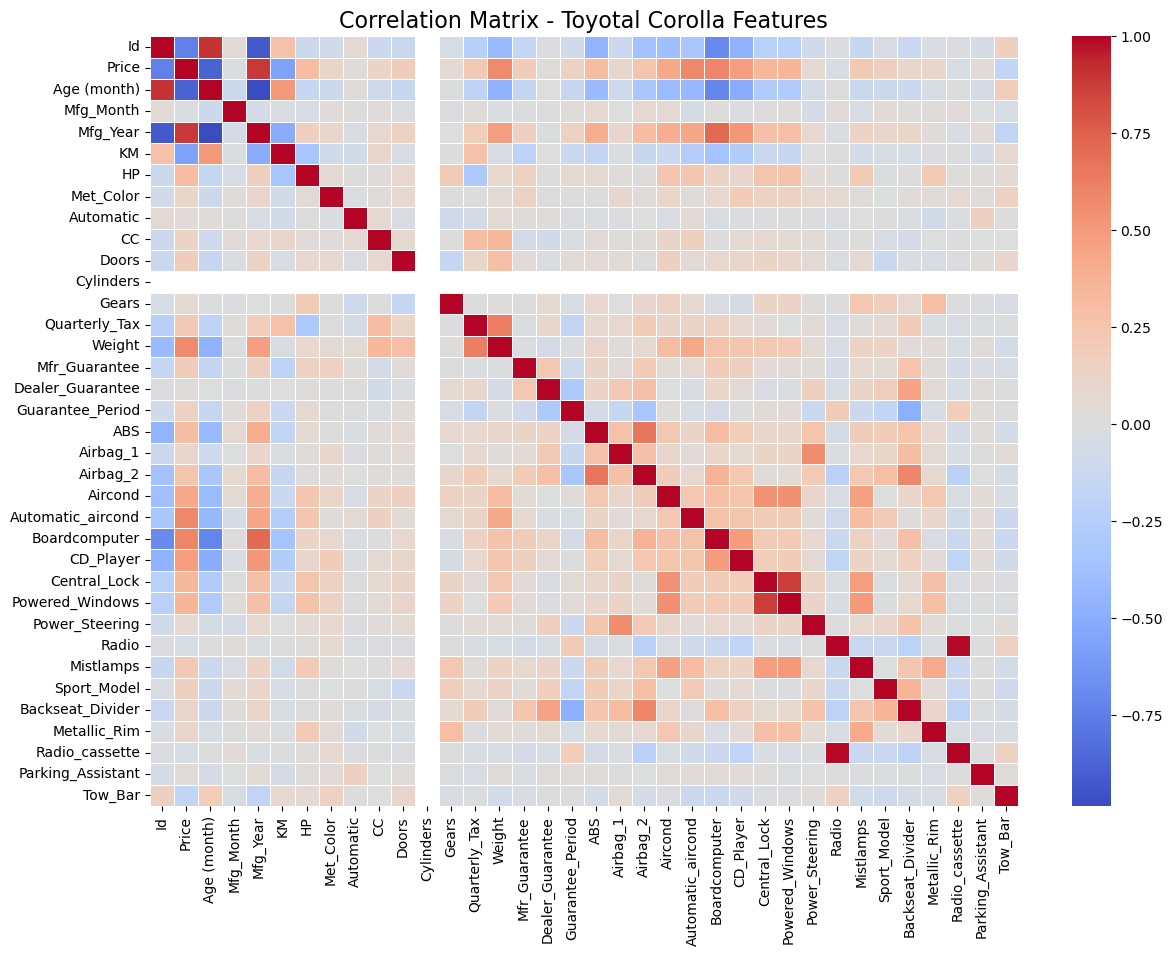

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df_encoded.select_dtypes(include=['int64', 'float64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix - Toyotal Corolla Features", fontsize=16)
plt.show()

In [14]:
plt.savefig("toyotal_corr_matrix.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df_numeric.drop(columns=['Id', 'Price'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [20]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

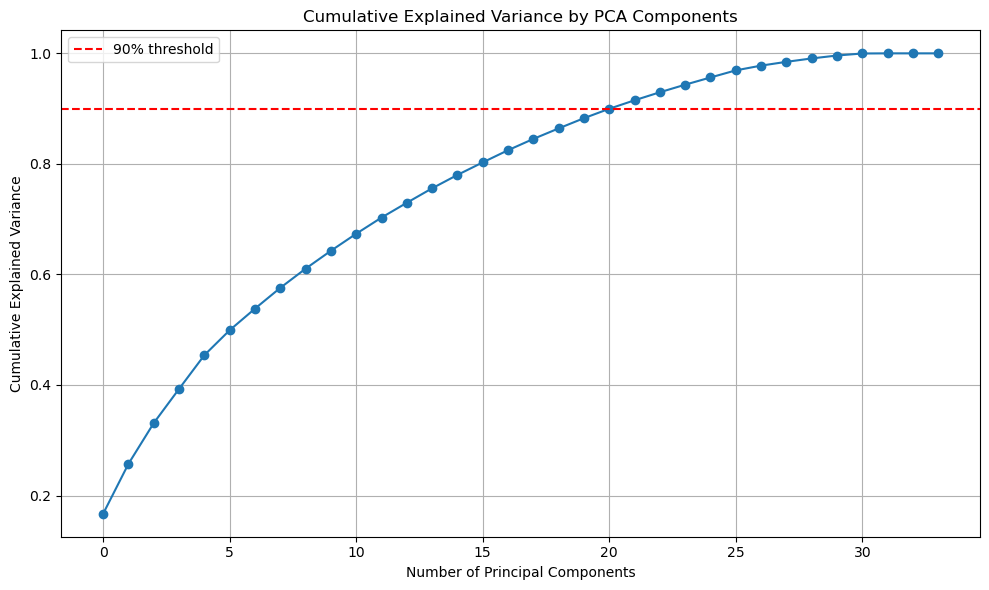

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.tight_layout()
plt.show()